<a href="https://colab.research.google.com/github/obaldin/Desafio_ONE_Alura_TelecomX_parte_II_Cassiano/blob/main/Challenge_Alura_TelecomX_analise_evasao_de_cliente_parte_2_Cassiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Preditiva de Evasão de Clientes (Churn) na TelecomX - Parte II**

# **1. Introdução e Objetivo**



Este projeto faz parte do curso de *Data Science* do **Programa ONE - Oracle Next Education em parceria com a Alura**. Ele tem como objetivo **identificar os clientes que possuem maior chance de cancelar seus serviços** (Churn) na empresa TelecomX. A previsão de churn é crucial para que a empresa possa tomar ações proativas para reter clientes valiosos, otimizando recursos e aumentando a receita a longo prazo. Através da análise de dados históricos de clientes, buscamos construir modelos de Machine Learning capazes de prever a probabilidade de um cliente evadir.

---

# **2. Metodologia**

A análise seguiu as etapas usuais de um projeto de Machine Learning:

*   Extração e Exploração dos Dados:
*   Preparação dos Dados:
*   Análise de Correlação e Multicolinearidade:
*   Preparação para Modelagem:
*   Modelagem Preditiva:
*   Avaliação dos Modelos:
*   Ajuste de Hiperparâmetros (Regressão Logística):

---

# **3. Análise dos dados**

Nessa sessão trabalharemos com:

* extração e exploração dos dados
* preparação dos dados
* análise de correlação e multicolinearidade
* preparação para a modelagem
* normalização/padronização dos dados
* modelagem preditiva

## **3.1 Extração e Exploração dos Dados**

* importar os dados
* explorar os dados como tipo, nome de colunas, se possuem dados nulos ou brancos

In [11]:
#Importar as bibliotecas para projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, average_precision_score, \
                            classification_report, roc_auc_score, roc_curve, \
                            RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [12]:
#carremento e leitura do dataset
url = '/content/drive/MyDrive/Colab Notebooks/2025-08-16_dados_tratados.csv'
df = pd.read_csv(url)
df

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalDay,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [13]:
#verificar os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [14]:
#verificar dados nulos
df.isna().sum()

,0
CustomerID,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [15]:
#verificar o nome das colunas
df.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalDay', 'ChargesMonthly',
       'ChargesTotal'],
      dtype='object')

## **3.2 Preparação dos dados**

* escolha dos dados únicos para usar no modelo
* converter variáveis categóricas em numéricas para evitar a multicolinearidade
* remover dados colineares


In [16]:
#remoção de colunas irrelevantes
df = df.drop(columns=['CustomerID'], axis=1)

In [17]:
# criar um novo DataFrame
df_limpo = df.copy()

# >>> Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df_limpo[col] = df_limpo[col].replace('No internet service', 'No')

# >>> Etapa 2: One-hot encoding (sem dummy trap)
colunas_categoricas = [
       'Churn', 'Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_tratado = pd.get_dummies(df_limpo, columns=colunas_categoricas, drop_first=True)

# Pronto para usar! Isso evitará a multicolinearidade
df_tratado

,SeniorCitizen,Tenure,TotalDay,ChargesMonthly,ChargesTotal,Churn_Yes,Gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [18]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Tenure                                 7043 non-null   int64  
 2   TotalDay                               7032 non-null   float64
 3   ChargesMonthly                         7043 non-null   float64
 4   ChargesTotal                           7032 non-null   float64
 5   Churn_Yes                              7043 non-null   bool   
 6   Gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [19]:
#verificar novamente se há dados nulos
df_tratado.isnull().sum()

,0
SeniorCitizen,0
Tenure,0
TotalDay,11
ChargesMonthly,0
ChargesTotal,11
Churn_Yes,0
Gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


In [20]:
#Confirmar as colunas que possuem NaN
print(df_tratado[['TotalDay', 'ChargesTotal']].isnull().sum())

TotalDay        11
ChargesTotal    11
dtype: int64


In [21]:
#remover NaN
df_tratado = df_tratado.dropna(subset=['TotalDay', 'ChargesTotal'])

In [22]:
#verificar novamente se há dados nulos
df_tratado.isnull().sum()

,0
SeniorCitizen,0
Tenure,0
TotalDay,0
ChargesMonthly,0
ChargesTotal,0
Churn_Yes,0
Gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


In [23]:
#outra opção seria substituir os valores NaN ou Nulos na coluna por zero
#df.fillna(0, inplace=True)

In [24]:
#verifica se tem valores infinitos
print(np.isinf(df_tratado).sum())

SeniorCitizen                            0
Tenure                                   0
TotalDay                                 0
ChargesMonthly                           0
ChargesTotal                             0
Churn_Yes                                0
Gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

In [25]:
# igual isnull()
print(df_tratado.isna().sum())

SeniorCitizen                            0
Tenure                                   0
TotalDay                                 0
ChargesMonthly                           0
ChargesTotal                             0
Churn_Yes                                0
Gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

In [26]:
#procura strings vazias
print((df_tratado == '').sum())

SeniorCitizen                            0
Tenure                                   0
TotalDay                                 0
ChargesMonthly                           0
ChargesTotal                             0
Churn_Yes                                0
Gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

In [27]:
#procura um espaço só
print((df_tratado == ' ').sum())

SeniorCitizen                            0
Tenure                                   0
TotalDay                                 0
ChargesMonthly                           0
ChargesTotal                             0
Churn_Yes                                0
Gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMeth

In [28]:
#mostra os tipos de dados
print(df.dtypes)

Churn                object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
TotalDay            float64
ChargesMonthly      float64
ChargesTotal        float64
dtype: object


## **3.3 Análise de Correlação e Multicolinearidade**

Nesta sessão será feito:
* Um mapa de calor para visualizar a correlação entre as variáveis
* Uma análise de Variance Inflation Factor (VIF) para identificar e tratar a multicolinearidade. Colunas com VIF infinito ou muito alto serão removidas para garantir a estabilidade dos modelos lineares.


In [29]:
#correlação entre as variáveis
corr = df_tratado.corr()

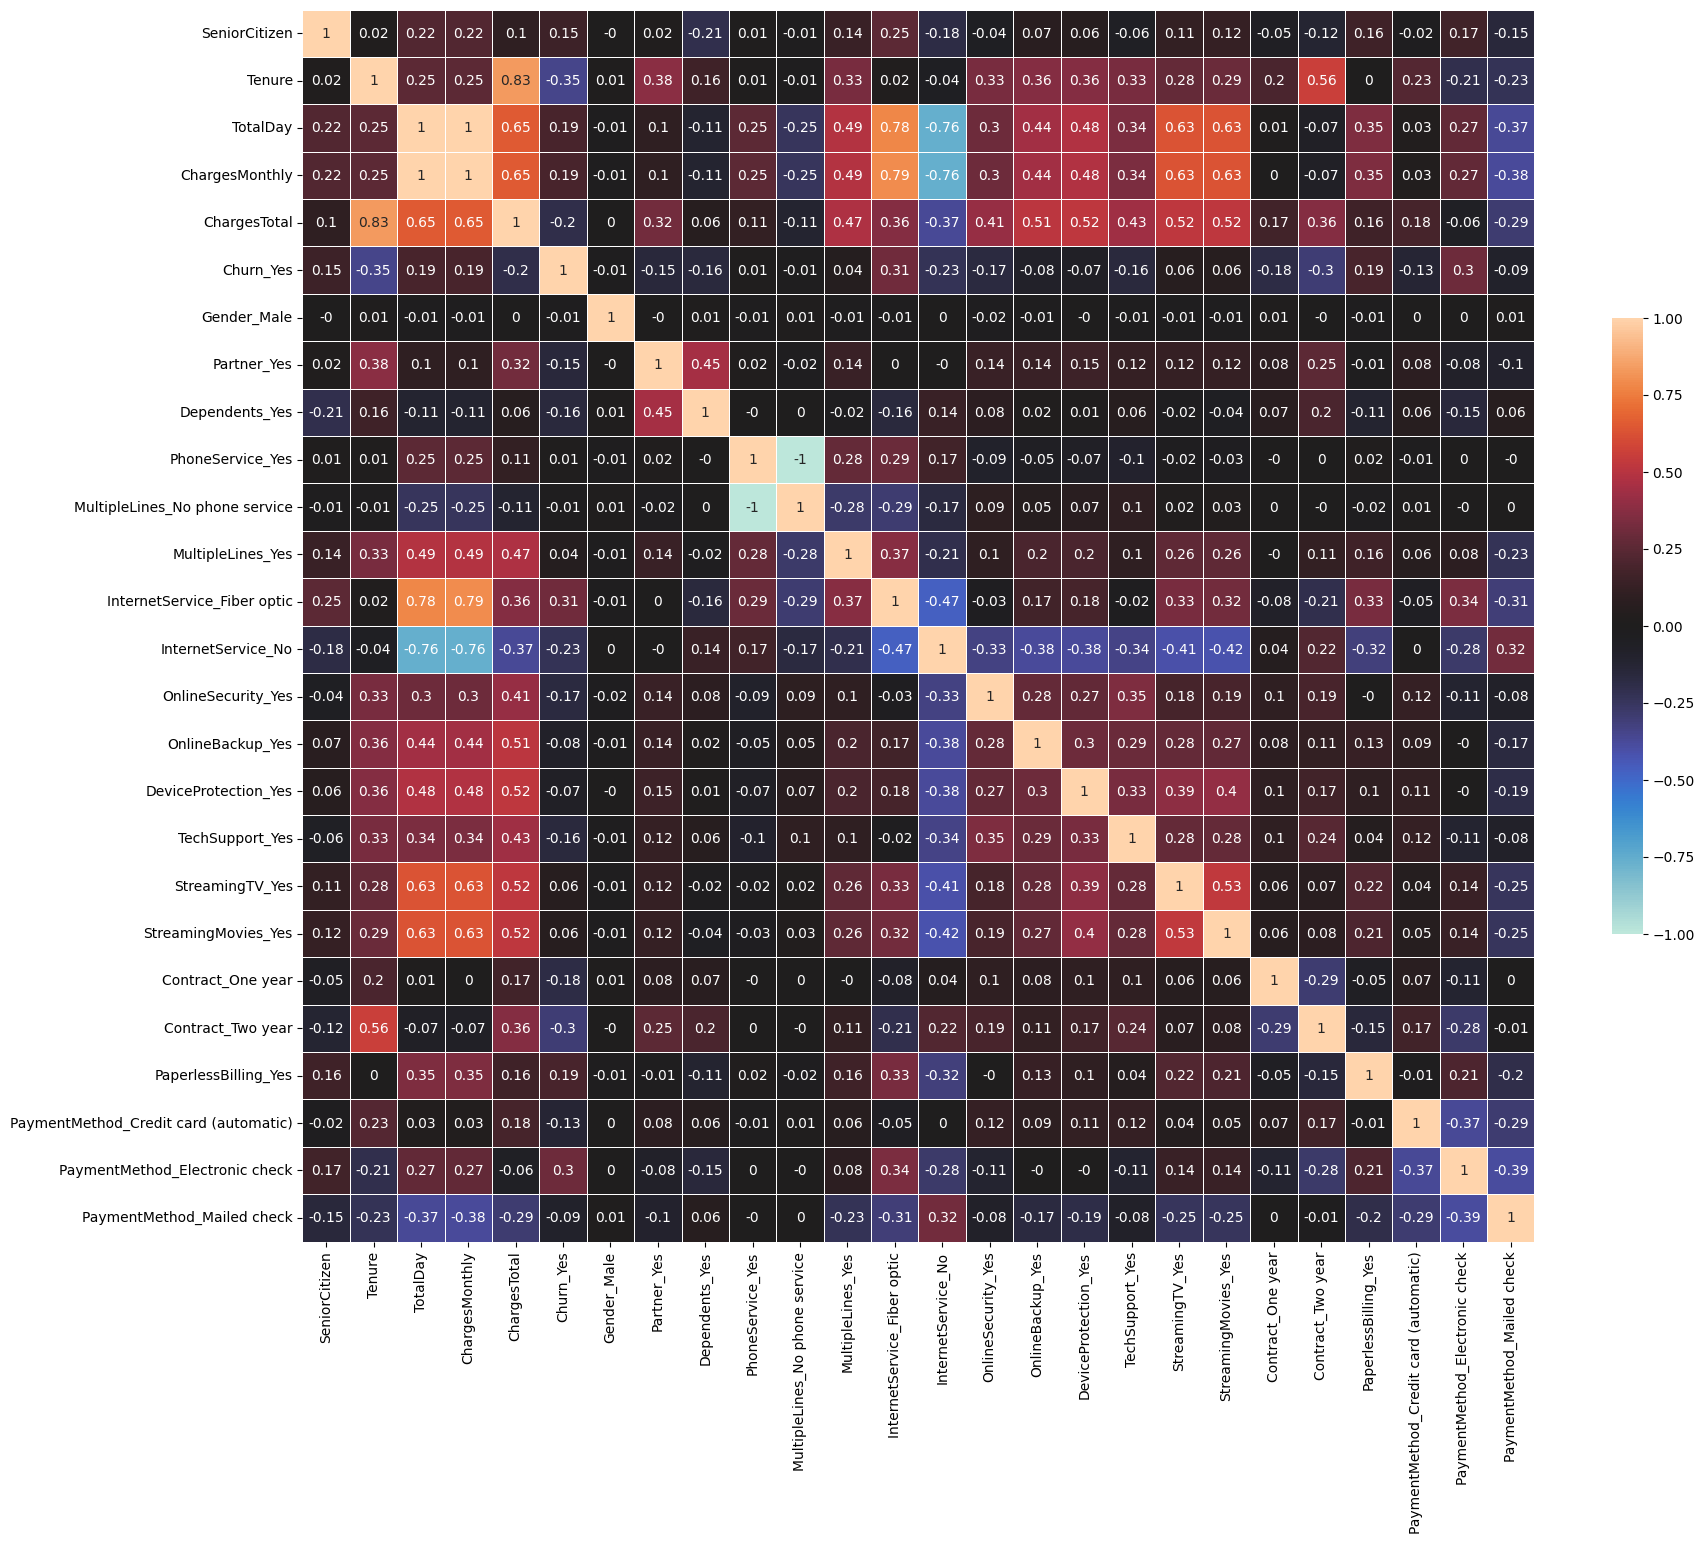

In [30]:
#visualizar a correlação
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

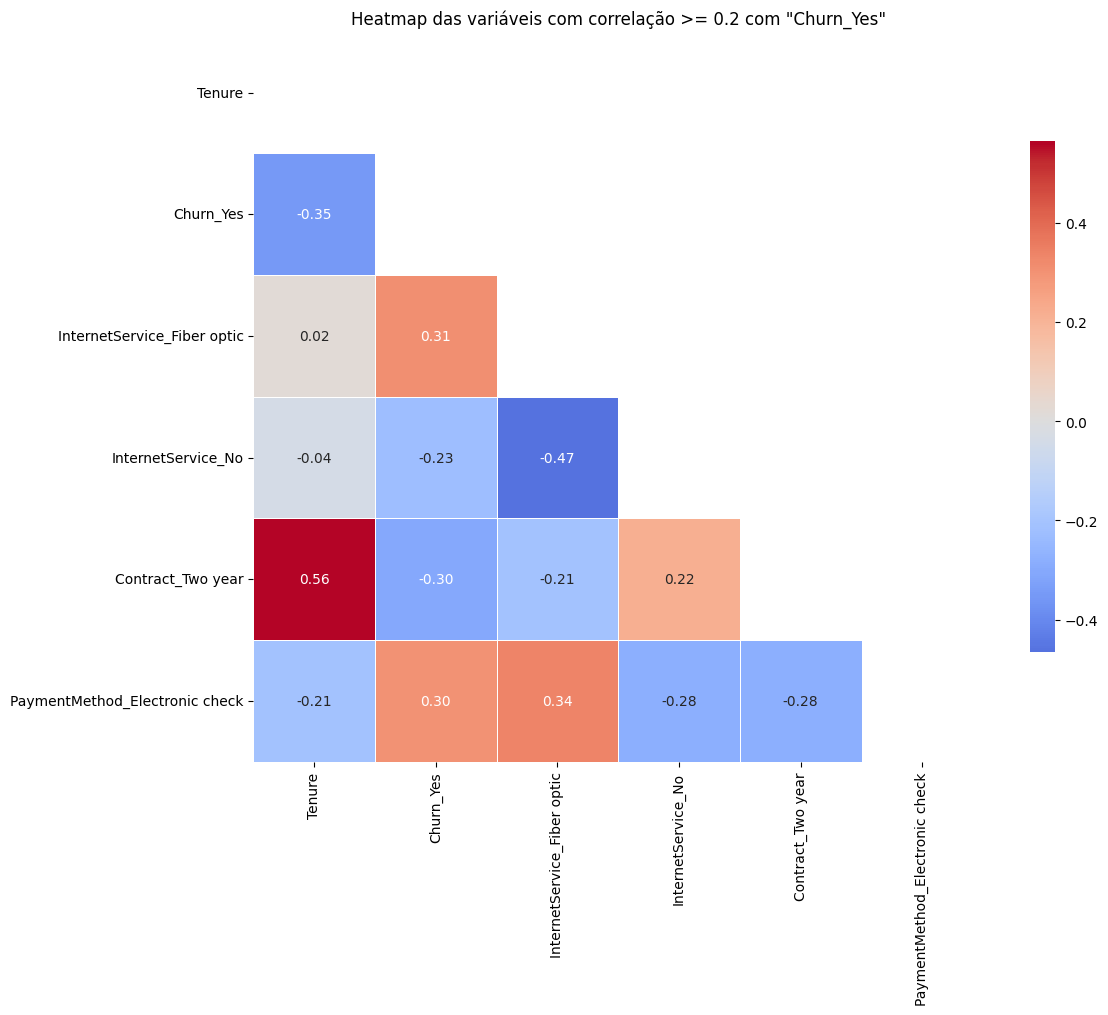

In [31]:
#Definir a variável alvo
variavel_alvo = 'Churn_Yes'

# Definir o limiar mínimo de correlação absoluta para seleção, ou seja, que seja mais relevante.
# Os valores podem variam, no entanto, quando acima de 0.2 é que há correlação forte
limiar = 0.2

# Filtrar as variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[variavel_alvo]) >= limiar].tolist()

# Garantir que a variável alvo está na lista;  aso não estiver, adiciona
if variavel_alvo not in variaveis_relevantes:
    variaveis_relevantes.append(variaval_alvo)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{variavel_alvo}"')
plt.tight_layout()

plt.savefig('heatmap_variaveis_correlacao_com_churn_yes_plot.png')

plt.show()

**Observação: **

Na análise dessa HeatMap podemos notar as correlações entre as variáveis. Como não possuem valores iguais a 1, signifca que não temos multicolinearidade e podemos seguir em frente.

Por fim, podemos ver que não é necessário fazer a análise de colienaridade. Todavia, seguiremos com ela para o exercício e prática. Ela pode ser feita de 3 maneiras:

1. excluindo as colunas que são redundantes (mais trabalhosa e pode gerar problemas)
2. usar análise de Variance  Inflation Factor (VIF) (usaremos essa análise)
3. combinar variáveis entre si (mais trabalhosa)

### **3.3.1 Análise de Multicolinearidade com VIF**

In [ ]:
# Seleção das variáveis independentes, não inclui a variável-alvo (ex: Churn_Yes)
X = df_tratado.drop(columns=['Churn_Yes'])

In [4]:
#Adicionar a constante (intercepto)
X_const = add_constant(X)

NameError: name 'add_constant' is not defined

In [5]:
#Calcular a VIF

#Converter as colunas 'boolean' para 'interger' (0 ou 1)
X_const = X_const.astype(float)

#Calcular a VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

#Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

NameError: name 'X_const' is not defined

**Observação:**

Aqui podemos observar que "PhoneService_Yes" e "MultipleLines_No phone service" tem valores infinitos o que caracteriza colinearidade, pois há uma redundância a partir da variável categórica "PhoneService". Por tanto, essas colunas serão removidas.

Já a coluna "ChargesMonthly" possui um valor muito alto, o que mostra colinearidade com  "ChargesTotal" e "TotalDay". Vamos avaliar se não há informação repetida e, sendo o caso, a coluna será removida para evitar redundância.

Já os valores acima de 10, precisam ainda de atenção. Devemos analisar quais colunas podem estar causando redundância e seguir com a remoção das colunas.

Os VIFs com valores entre 5 e 10 devem ser acompanhadas.

E os VIFs menores de 5 possuem valores aceitáveis.

### **3.3.2 Melhorando o FIV**

In [6]:
#1: Copiar o X original para não modificar o original
X_filtrado = X_const.copy()

#2: Remover as variáveis com multicolinearidade perfeita (VIF = inf)
remover_colunas = [
    "PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtrado.drop(columns=remover_colunas, inplace=True)

#3: Remover redundâncias fortes entre variáveis numéricas
# Se 'TotalDay' e 'ChargesTotal' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtrado.drop(columns=["TotalDay"], inplace=True)

#4: Remover redundância entre dummies da mesma variável categórica
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtrado.drop(columns=["InternetService_No"], inplace=True)

#5: Garantir que os dados estão em float para o VIF funcionar
X_filtrado = X_filtrado.astype(float)

#6: Recalcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtrado.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtrado.values, i) for i in range(X_filtrado.shape[1])]

#7: Exibir os resultados
display(vif_data.sort_values(by="VIF", ascending=False))

NameError: name 'X_const' is not defined

**Observação:**

Conseguimos melhorar o FIV, mas ainda percebemos que as colunas "ChargesMonthly", "ChargesTotal" e "Tenure" apresentam colinearidade alta. Como "ChargesTotal" é derivada de "ChargesMonthly", podemos remover essa coluna.

### **3.3.3 FIV Ideal**

In [ ]:
#8 Remover a variável ChargesTotal
X_final = X_filtrado.drop(columns=["ChargesTotal"])

#9 Recalcular o VIF
vif_final = pd.DataFrame()
vif_final["feature"] = X_final.columns
vif_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

#10 Exibir os resultados ordenados
display(vif_final.sort_values(by="VIF", ascending=False))

**Observação:**

Agora com o VIF final, mesmo que "ChargesMonthly" e "InternetService_Fiber optic" ainda estejam altos, os demais valores estão baixos. Isso não impactará a análise com os modelos preditivos

### **3.3.4 Gráfico de correlação das variáveis finais com a variável de evasão (Churn_Yes)**

In [7]:
# Calcular a correlação das variáveis em X_final com a variável alvo Churn_Yes (y)
# Juntar X_final e y para calcular a correlação
df_final_corr = X_final.copy()
df_final_corr['Churn_Yes'] = y

# Calcular a correlação da variável alvo com as outras variáveis
corr_com_churn = df_final_corr.corr()['Churn_Yes'].sort_values(ascending=False)

# Remover a correlação da variável alvo consigo mesma (que será 1)
corr_com_churn = corr_com_churn.drop('Churn_Yes')

# Selecionar as 20 maiores correlações (ou todas se forem menos de 20)
num_vars_para_plot = min(20, len(corr_com_churn))
top_corr = corr_com_churn.head(num_vars_para_plot)

# Criar o gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm', orient='h')
plt.title("Correlation of Final Variables with Churn_Yes")
plt.xlabel("Correlation Coefficient")
plt.ylabel("")

plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('Correlation_of_final_variables_with_churn_yes_plot.png')

plt.show()

NameError: name 'X_final' is not defined

**Observação:**

Neste gráfico, podemos analisar visualmente a correlação de cada variável final com a variável de evasão e visualizar as variáveis mais correlacionadas (positiva ou negativamente). Isso ajuda a identificar quais fatores estão mais fortemente associados com a probabilidade de um cliente cancelar o serviço.

## **3.4 Preparação para Modelagem**

*   Separar os dados em features e target
*   Dividir em treino e teste
*   Remoção de colunas que não contribuirão para o modelo preditivo.
*   Tratar variáveis categóricas
*   Converter variáveis categóricas em numéricas, evitando a multicolinearidade através da remoção da primeira coluna dummy.
*   Remover valores nulos restantes

In [ ]:
#Separar as features e target
X = df_tratado.drop(columns=['Churn_Yes'])
y = df_tratado['Churn_Yes']

In [ ]:
#Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### **3.4.1 Normalização/Padronização**

Para analisar os modelos com Regressão Logística, seguiremos antes com a normalização dos dados.

Todavia, testaremos também no modelo Random Forest. Apesar de não precisar de normalização, seguiremos com a normalização para praticar.

In [ ]:
#verificar a proporção de evasão
df_tratado['Churn_Yes'].value_counts(normalize=True)

In [ ]:
#fazer a correlação entre as variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Balancear o treino com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

NameError: name 'SMOTE' is not defined

## **3.5 Modelagem Preditiva**

Serão usados os modelos de classificação para treino e avaliação:

* Regressão Logística
* Random Forest
* Random Forest
* Support Vector Machine (SVC)
* Gradient Boosting
* K-Nearest Neighbors (KNN)
* Decision Tree


### **3.5.1 Regressão Logística**

In [ ]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

In [ ]:
#Mostrar gráfico da Curva de ROC da Regressão Logística
fpr, tpr, theresholds = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Regressão Logística')
plt.legend()

#Mostrar gráfico da Curva de Precisão da Regressão Logística
precision, recall, theresholds_pr = precision_recall_curve(y_test, y_prob_lr)
ap_score = average_precision_score(y_test, y_prob_lr)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Regressão Logísitca')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da Regressão Logística
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.subplot(1, 3, 3)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Regressão Logística')

# Salvar o gráfico em um arquivo png
plt.savefig('regressao_logistica_performance_plot.png')

plt.tight_layout()
plt.show()

### **3.5.2 Random Forest (com dados normalizados)**

In [ ]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [ ]:
#Mostrar gráfico da Curva de ROC da Random Forest (dados normalizados)
fpr, tpr, theresholds_rf = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (dados normalizados)')
plt.legend()

#Mostrar gráfico da Curva de Precisão da Random Forest (dados normalizados)
precision, recall, theresholds_rf = precision_recall_curve(y_test, y_prob_rf)
ap_score = average_precision_score(y_test, y_prob_rf)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (dados normalizados)')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da Random Forest (dados normalizados)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.subplot(1, 3, 3)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (dados normalizados)')

plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('random_forest_performance_plot.png')

plt.show()

### **3.5.3 Random Forest (sem normalização)**

In [ ]:
# Instanciar e treinar com Random Forest nos dados originais
rf_s = RandomForestClassifier(random_state=42)
rf_s.fit(X_train, y_train)

# Previsões
y_pred_rf_s = rf_s.predict(X_test)
y_prob_rf_s = rf_s.predict_proba(X_test)[:, 1]

# Avaliação
print("Random Forest (Sem Normalização)")
print("Acurácia:", accuracy_score(y_test, y_pred_rf_s))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf_s))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf_s))
print(classification_report(y_test, y_pred_rf_s))

In [ ]:
# Mostrar gráfico da Curva de ROC da Random Forest (Sem Normalização)
fpr_rf_s, tpr_rf_s, theresholds_rf_s = roc_curve(y_test, y_prob_rf_s)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr_rf_s, tpr_rf_s, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_rf_s):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Sem Normalização)')
plt.legend()


#Mostrar gráfico da Curva de Precisão da Random Forest (Sem Normalização)
precision, recall, theresholds_rf_s = precision_recall_curve(y_test, y_prob_rf_s)
ap_score = average_precision_score(y_test, y_prob_rf_s)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (sem normalização)')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da Random Forest (Sem Normalização)
cm_rf_s = confusion_matrix(y_test, y_pred_rf_s)

plt.subplot(1, 3, 3)
sns.heatmap(cm_rf_s, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (sem normalização)')

plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('random_forest_sem_normalizacao_performance_plot.png')

plt.show()

### **3.5.4 Suport Vector Machine - SVC**

In [ ]:
# Instanciar e treinar com o modelo SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_svc = svc.predict(X_test_scaled)
y_prob_svc = svc.predict_proba(X_test_scaled)[:, 1]

#Avaliação
print("Support Vector Machine (SVC)")
print("Acurácia:", accuracy_score(y_test, y_pred_svc))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svc))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

In [ ]:
# Mostrar gráfico da Curva de ROC da SVC
fpr_svc, ptr_svc, theresholds_svc = roc_curve(y_test, y_prob_svc)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr_svc, ptr_svc, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_svc):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend()


#Mostrar gráfico da Curva de Precisão da SVC
precision, recall, theresholds_svc = precision_recall_curve(y_test, y_prob_svc)
ap_score = average_precision_score(y_test, y_prob_svc)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVC')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.subplot(1, 3, 3)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')

plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('SVC_performance_plot.png')

plt.show()

### **3.5.5 Gradient Boosting**


In [ ]:
# Instanciar e treinar com a Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)[:, 1]

#Avaliações
print("\nGradient Boosting")
print("Acurácia:", accuracy_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_gb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

In [ ]:
#Mostrar gráfico da Curva de ROC da Gradient Boosting
fpr_gb, ptr_gb, theresholds_gb = roc_curve(y_test, y_prob_gb)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr_gb, ptr_gb, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_gb):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()


#Mostrar gráfico da Curva de Precisão da Gradient Boosting
precision, recall, theresholds_gb = precision_recall_curve(y_test, y_prob_gb)
ap_score = average_precision_score(y_test, y_prob_gb)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.subplot(1, 3, 3)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')

plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('gradient_boosting_performance_plot.png')

plt.show()

### **3.5.6 KNN**

In [ ]:
# Instanciar e treinar o modelo KNN nos dados balanceados e escalados
knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)

#Previsões
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

#Avaliação
print("K-Nearest Neighbors (KNN)")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

In [ ]:
#Mostrar gráfico da Curva de ROC da KNN
fpr_knn, ptr_knn, theresholds_knn = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr_knn, ptr_knn, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_knn):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()

#Mostrar gráfico da Curva de Precisão da KNN
precision, recall, theresholds_knn = precision_recall_curve(y_test, y_prob_knn)
ap_score = average_precision_score(y_test, y_prob_knn)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.subplot(1, 3, 3)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('KNN_performance_plot.png')


plt.show()

### **3.5.7 Decision Tree**

In [ ]:
# Instanciar e treinar o modelo Decision Tree nos dados balanceados
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

#Previsões
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

#Avaliação
print("\nDecision Tree")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

In [ ]:
#Mostrar gráfico da Curva de ROC da Decision Tree
fpr_dt, ptr_dt, theresholds_dt = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr_dt, ptr_dt, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()


#Mostrar gráfico da Curva de Precisão da Decision Tree
precision, recall, theresholds_dt = precision_recall_curve(y_test, y_prob_dt)
ap_score = average_precision_score(y_test, y_prob_dt)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.subplot(1, 3, 3)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('decision_tree_performance_plot.png')

plt.show()

**Observação:**

Após avaliação dos KNN e Decision Tree, vemos um pior desempenho, os quais apresentaram métricas de Acurácia e ROC AUC mais baixas em comparação com os outros modelos.

### **3.5.8 Ajuste de hiperparâmetros para o Modelo de Regressão Logística**


A seguir fizemos uma otimização dos hiperparâmetros do modelo de Regressão Logística para tentar melhorar ainda mais seu desempenho, pois foi identificado como o modelo mais promissor.

In [ ]:
# Definir o parameter grid para a Regressão Logística
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverter da força de regularização
    'penalty': ['l2'], # 'l1', ‘l2’, ‘elasticnet’ - ‘liblinear’ e ‘saga’ suportam ‘l1’ e ‘l2’; ‘saga’ e ‘elasticnet’ suportam 'elasticnet'
    'solver': ['liblinear', 'saga'], # Algorítimos para usar na otimização do problema
    # 'l1_ratio': [0, 0.5, 1] # Para penalidade elasticnet
}

# Instanciar a Regressão Logística
lr_grid = LogisticRegression(random_state=42)

# Instanciar GridSearchCV
grid_search = GridSearchCV(
    estimator=lr_grid,
    param_grid=param_grid,
    cv=5,  # validação cruzada 5 vezes
    scoring='roc_auc',  # Otimizar para ROC AUC
    n_jobs=-1  # Use todos os núcleos da CPU disponíveis
)

# Ajuste o GridSearchCV aos dados de treinamento equilibrados e escalonados
grid_search.fit(X_train_bal, y_train_bal)

# Obtenha o melhor modelo e os melhores parâmetros
best_lr_model = grid_search.best_estimator_
best_lr_params = grid_search.best_params_

print("Melhores hiperparâmetros encontrados:", best_lr_params)

# Previsões do melhor modelo
y_pred_best_lr = best_lr_model.predict(X_test_scaled)
y_prob_best_lr = best_lr_model.predict_proba(X_test_scaled)[:, 1]

# Avaliação do melhor modelo
print("\nRegressão Logística Otimizada")
print("Acurácia:", accuracy_score(y_test, y_pred_best_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_best_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_best_lr))
print(classification_report(y_test, y_pred_best_lr))

In [ ]:
#Mostrar gráfico da Curva de ROC da Regressão Logística Otimizada
fpr_best, prt_best, theresholds_best = roc_curve(y_test, y_prob_best_lr)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr_best, prt_best, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob_best_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Regressão Logística Otimizada')
plt.legend()


#Mostrar gráfico da Curva de Precisão da Regressão Logística Otimizada
precision, recall, theresholds_best = precision_recall_curve(y_test, y_prob_best_lr)
ap_score = average_precision_score(y_test, y_prob_best_lr)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label=f'Average Precision = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Regressão Logística Otimizada')
plt.legend()

#Mostrar gráfico da Matriz de Confusão da Regressão Logística Otimizada
cm_dt = confusion_matrix(y_test, y_pred_best_lr)

plt.subplot(1, 3, 3)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Churn', 'Predicted Churn'],
            yticklabels=['Actual Non-Churn', 'Actual Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Regressão Logística Otimizada')

plt.tight_layout()

# Salvar o gráfico em um arquivo png
plt.savefig('regressa_logistica_otimizada_plot.png')

plt.show()

### **3.5.9 Avaliação dos Modelos**

Os modelos foram avaliados utilizando métricas relevantes para problemas de classificação, especialmente considerando o objetivo de identificar churners:

*   Acurácia
*   ROC AUC (Área sob a Curva Característica de Operação do Receptor)
*   Curva Precision-Recall e Average Precision
*   Matriz de Confusão
*   Classification Report (Precision, Recall, F1-score por classe)

In [9]:
# Métricas dos modelos (coletadas dos outputs anteriores)
models = ['Regressão Logística', 'Regressão Logística Otimizada', 'Random Forest (Sem Norm.)', 'SVC', 'Gradient Boosting', 'KNN', 'Decision Tree']
accuracy_scores = [0.750, 0.751, 0.793, 0.756, 0.775, 0.692, 0.732]
recall_scores = [0.81, 0.81, 0.50, 0.72, 0.68, 0.74, 0.58] # Recall para a classe 'True' (Evasão)
roc_auc_scores = [0.845, 0.845, 0.824, 0.824, 0.842, 0.754, 0.683]
average_precision_scores = [0.65, 0.65, 0.61, 0.60, 0.65, 0.46, 0.40]

x = np.arange(len(models)) # Posições dos grupos de barras no eixo X
width = 0.18 # Ajustar a largura das barras para acomodar 4 métricas

plt.figure(figsize=(18, 8)) # Ajustar o tamanho da figura

# Obter cores de um colormap (por exemplo, 'Blues') - agora 4 tons
colors = cm.Blues([1, 0.8, 0.6, 0.4])

# Criar as barras para cada métrica, deslocando a posição X e atribuindo cores
rects1 = plt.bar(x - width*1.5, accuracy_scores, width, label='Accuracy', color=colors[0])
rects2 = plt.bar(x - width*0.5, recall_scores, width, label='Recall (Churn)', color=colors[1])
rects3 = plt.bar(x + width*0.5, roc_auc_scores, width, label='ROC AUC', color=colors[2])
rects4 = plt.bar(x + width*1.5, average_precision_scores, width, label='Average Precision', color=colors[3])

# Adicionar rótulos, título e ticks do eixo X
plt.ylabel('Metric Score') # Rótulo do eixo Y em inglês
plt.title('Comparison of Model Performance Metrics') # Título em inglês
plt.xticks(x, models, rotation=0, ha='center') # Usar nomes dos modelos nos ticks do eixo X e rotacionar
plt.ylim(0, 0.9) # Limitar o eixo Y entre 0 e 0.9 para dar espaço para os rótulos
#plt.grid(axis='y', linestyle='--', alpha=0.7) # Adicionar grade horizontal

plt.legend(loc='upper right') # Exibir legenda no canto superior direito

# Função para adicionar os valores em cima das barras
def autolabel(rects):
    """Anexa um rótulo de texto em cada barra no respectivo gráfico."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('%.2f' % height, # Formatar para 2 casas decimais
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8) # Ajustar tamanho da fonte

# Adicionar os rótulos aos conjuntos de barras
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout() # Ajustar layout para evitar sobreposição

# Salvar o gráfico em um arquivo png
plt.savefig('comparison_model_performance_metrics_plot.png')

plt.show()

NameError: name 'np' is not defined

**Observação:**

Ao avaliar o gráfico, nota-se que a otimização do modelo Regressão Logística possui os mesmos valores. Ainda assim, será feito um novo gráfico e mantido apenas a Regressão Logística Otimizada, pois conseguiu uma mínima melhora.

In [ ]:
# Métricas dos modelos (coletadas dos outputs anteriores)
models = ['Regressão Logística Otimizada', 'Random Forest (Sem Norm.)', 'SVC', 'Gradient Boosting', 'KNN', 'Decision Tree']
accuracy_scores = [0.751, 0.793, 0.756, 0.775, 0.692, 0.732] # Adicionado Acc da Otimizada
recall_scores = [0.81, 0.50, 0.72, 0.68, 0.74, 0.58] # Recall para a classe 'True' (Evasão) - Adicionado Recall da Otimizada
roc_auc_scores = [0.845, 0.824, 0.824, 0.842, 0.754, 0.683] # Adicionado ROC AUC da Otimizada
average_precision_scores = [0.65, 0.61, 0.60, 0.65, 0.46, 0.40] # Adicionado AP da Otimizada


x = np.arange(len(models)) # Posições dos grupos de barras no eixo X
width = 0.18 # Ajustar a largura das barras para acomodar 4 métricas

plt.figure(figsize=(18, 8)) # Ajustar o tamanho da figura para acomodar mais modelos
ax = plt.gca() # Obter os eixos atuais

# Obter cores de um colormap (por exemplo, 'Blues') - agora 4 tons
colors = cm.Blues([1, 0.8, 0.6, 0.4])


# Criar as barras para cada métrica, deslocando a posição X e atribuindo cores
rects1 = ax.bar(x - width*1.5, accuracy_scores, width, label='Accuracy', color=colors[0])
rects2 = ax.bar(x - width*0.5, recall_scores, width, label='Recall (Churn)', color=colors[1])
rects3 = ax.bar(x + width*0.5, roc_auc_scores, width, label='ROC AUC', color=colors[2])
rects4 = ax.bar(x + width*1.5, average_precision_scores, width, label='Average Precision', color=colors[3])


# Adicionar rótulos, título e ticks do eixo X
ax.set_ylabel('Metric Score')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0, ha='center') # Usar nomes dos modelos nos ticks do eixo X
ax.set_ylim(0, 0.9) # Limitar o eixo Y entre 0 e 0.9 para dar espaço para os rótulos (ajustado para o novo visual)
#ax.grid(axis='y', linestyle='--', alpha=0.7) # Adicionar grade horizontal

ax.legend(loc='upper right') # Exibir legenda no canto superior direito

# Função para adicionar os valores em cima das barras
def autolabel(rects):
    """Anexa um rótulo de texto em cada barra no respectivo gráfico."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height, # Formatar para 2 casas decimais
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8) # Ajustar tamanho da fonte


# Adicionar os rótulos aos conjuntos de barras
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Remover bordas, ticks e valores do eixo Y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) # Remover a linha da borda esquerda

ax.yaxis.set_ticks_position('none') # Remover os ticks do eixo Y
ax.set_yticklabels([]) # Remover os valores/rótulos do eixo Y
ax.set_ylabel('') # Remover o rótulo do eixo Y

# Salvar o gráfico em um arquivo png
plt.savefig('comparison_model_performance_metrics_optimized_plot.png')

plt.tight_layout() # Ajustar layout para evitar sobreposição
plt.show()

### **3.5.10 Salvando o melhor modelo**

In [ ]:
# abrir um arquivo no formato de escrita binária e salvar

try:
    with open('regressao_logistica_otimizado.pkl', 'wb') as file:
        pickle.dump(best_lr_model, file) # Corrected to use best_lr_model
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao salvar o modelo: ', str(e))

---

# **4. Resultados e Discussão**

A avaliação dos diferentes modelos revelou variações em seu desempenho, dependendo da métrica considerada. Dada a natureza do problema de negócio (identificar clientes com alta propensão a cancelar para ações de retenção), a métrica **Recall para a classe positiva (Churn)** é de suma importância. Um alto Recall significa que o modelo é eficaz em identificar a maior parte dos clientes que *realmente* evadirão, minimizando os falsos negativos (clientes que evadirão, mas o modelo previu que não).

Com base nessa prioridade, o modelo a ser escolhido para este projeto é a **Regressão Logística Otimizada (com dados normalizados e balanceados)**.

Como observado na comparação das métricas e visualizações (como o gráfico de barras e a matriz de confusão), a Regressão Logística alcançou o maior Recall para a classe de "Evasão" (0.81). Isso indica que este modelo foi capaz de identificar 81% dos clientes que efetivamente cancelaram seus serviços no conjunto de teste.

Embora outros modelos tenham apresentado melhor Acurácia geral (como o Random Forest sem normalização, 0.793) ou Precision para a classe de evasão (Random Forest sem normalização, 0.64), a capacidade da Regressão Logística de capturar a maioria dos casos de churn real a torna mais adequada para o objetivo de identificar o maior número possível de clientes em risco.

A Regressão Logística também apresentou um forte ROC AUC (0.845), comparável ao do Gradient Boosting (0.842), indicando uma boa capacidade de discriminação entre as classes. A otimização de hiperparâmetros para a Regressão Logística trouxe um ganho marginal no ROC AUC, mas manteve o alto Recall.

Os modelos KNN e Decision Tree, nas configurações testadas, apresentaram desempenho inferior em métricas como Acurácia e ROC AUC comparados aos modelos Regressão Logística, Random Forest, SVC e Gradient Boosting, e portanto, não foram considerados os modelos mais adequados para este problema.

Abaixo, o gráfico resumo compara as métricas chave para todos os modelos avaliados:


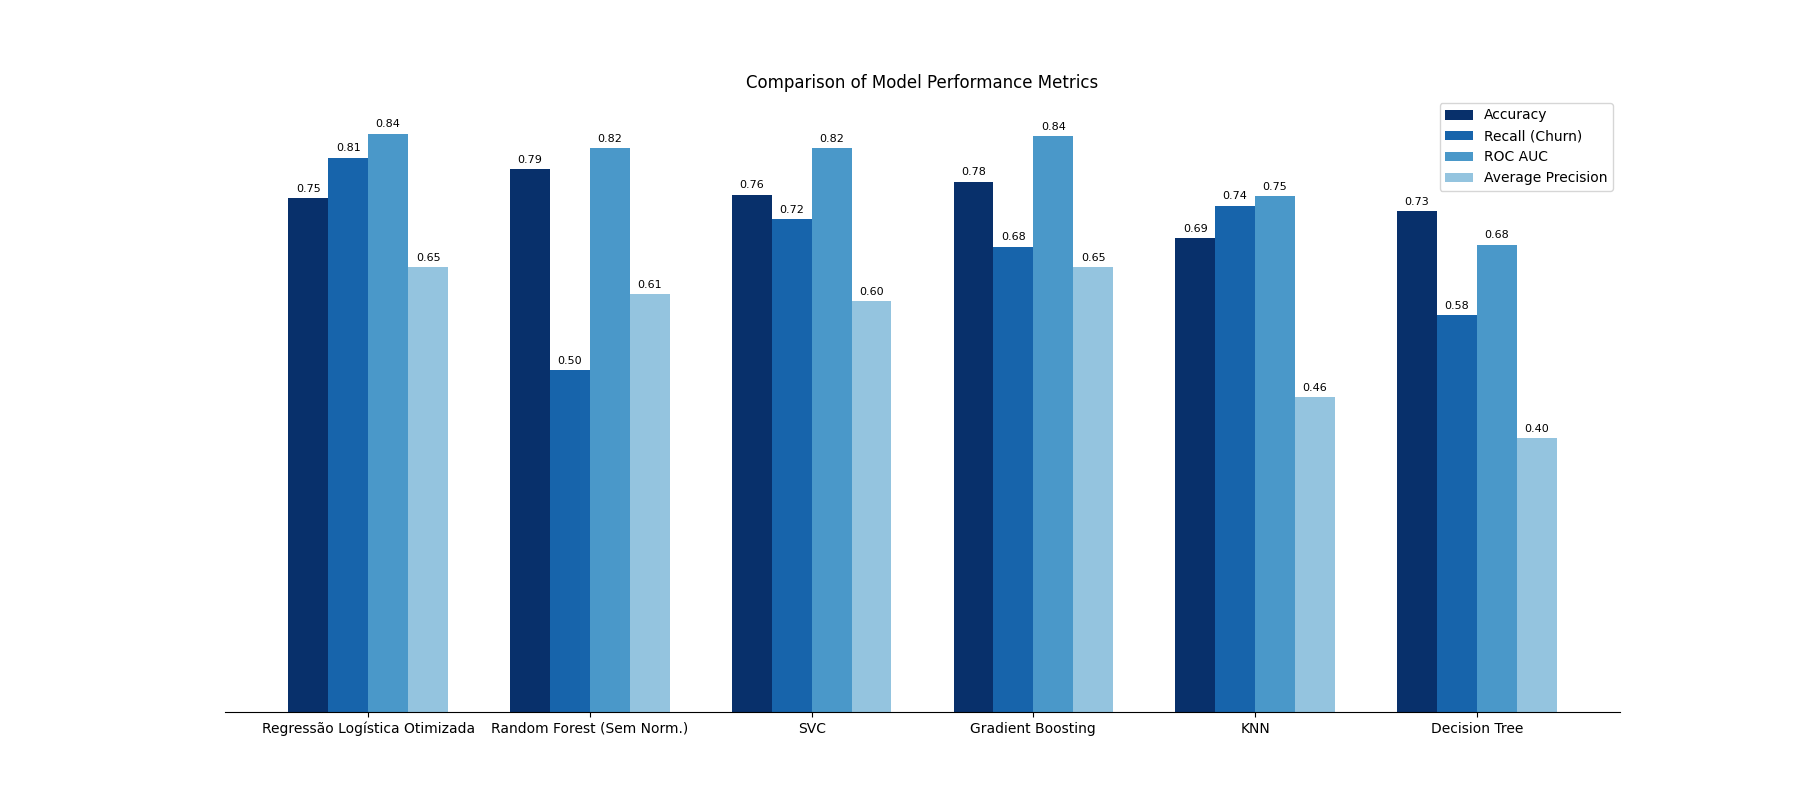

---

# **5. Conclusão**

Com base na análise e avaliação dos modelos preditivos, a **Regressão Logística Otimizada** se destaca como o modelo mais apropriado para o objetivo de **identificar o máximo possível de clientes propensos à evasão (churn)** na TelecomX, devido ao seu alto Recall para a classe de Churn.

Recomendamos a implementação do modelo de Regressão Logística treinado com dados normalizados e balanceados. Os resultados do modelo podem ser utilizados pela equipe de marketing ou atendimento ao cliente para direcionar ações de retenção, oferecendo promoções, suporte ou outras estratégias personalizadas aos clientes identificados com alta probabilidade de evasão.

É importante notar que a Precision da Regressão Logística para a classe de evasão (0.52) indica que, quando o modelo prevê churn, ele está correto cerca de 52% das vezes. Isso significa que haverá uma proporção de falsos positivos (clientes identificados como de alto risco de churn, mas que não evadiriam), o que deve ser considerado no planejamento das ações de retenção (custo vs benefício de abordar falsos positivos).

Este projeto fornece uma base sólida para a previsão de churn, permitindo que a TelecomX tome decisões baseadas em dados para melhorar a retenção de clientes.

Como recomendação, a retenção de clientes pode envolver:
- um programa de fidelidade para novos clientes e suporte proativo.
- revisão de planos para garantir que os benefícios estão sendo entregues proporcional ao valor pago.
- oferecer pacotes de descontos ou benefícios exclusivos para clientes com contratos mais longos.

# **Relatório Final: Análise Preditiva de Evasão de Clientes (Churn) na TelecomX**

## **1. Introdução**

Este relatório apresenta os resultados da análise preditiva de evasão de clientes (churn) realizada para a TelecomX. O objetivo principal foi identificar os fatores que mais contribuem para o cancelamento de serviços por parte dos clientes e desenvolver modelos de Machine Learning capazes de prever a probabilidade de churn. As descobertas deste estudo visam subsidiar a empresa na implementação de estratégias proativas de retenção de clientes.

## **2. Metodologia**

A análise seguiu as etapas de um projeto de Machine Learning, incluindo:

*   **Extração e Exploração dos Dados:** Carregamento e inspeção inicial do dataset.
*   **Preparação dos Dados:** Tratamento de valores nulos, codificação de variáveis categóricas (One-Hot Encoding) e remoção de colunas irrelevantes.
*   **Análise de Correlação e Multicolinearidade:** Utilização de mapas de calor e Variance Inflation Factor (VIF) para identificar e mitigar a multicolinearidade entre as variáveis preditoras.
*   **Preparação para Modelagem:** Separação dos dados em conjuntos de treino e teste, e balanceamento da classe minoritária (Churn) utilizando SMOTE.
*   **Modelagem Preditiva:** Treinamento e avaliação de diversos modelos de classificação (Regressão Logística, Random Forest, SVC, Gradient Boosting, KNN, Decision Tree).
*   **Avaliação dos Modelos:** Comparação do desempenho dos modelos utilizando métricas como Acurácia, ROC AUC, Precision, Recall e F1-score, com foco no Recall para a classe Churn.
*   **Ajuste de Hiperparâmetros:** Otimização do modelo de Regressão Logística utilizando GridSearchCV.

## **3. Principais Fatores que Influenciam a Evasão (Churn)**

Com base na análise de correlação e na importância das variáveis nos modelos, os seguintes fatores foram identificados como os que mais influenciam a evasão de clientes:

*   **Tempo de Contrato (Tenure):** Clientes com menor tempo de contrato apresentam maior probabilidade de evasão. A correlação negativa com Churn_Yes (-0.35) indica que quanto maior o tempo como cliente, menor a chance de churn.
*   **Tipo de Contrato (Contract_Two year):** Clientes com contratos de dois anos têm uma probabilidade significativamente menor de evasão em comparação com contratos mensais ou de um ano. A correlação negativa (-0.30) reforça este ponto.
*   **Serviço de Internet (InternetService_Fiber optic):** Clientes que utilizam serviço de internet de fibra óptica apresentam uma correlação positiva com Churn_Yes (0.31), sugerindo que este tipo de serviço pode estar associado a uma maior propensão à evasão. Isso pode estar relacionado a problemas de qualidade, custo ou concorrência neste segmento.
*   **Método de Pagamento (PaymentMethod_Electronic check):** Clientes que utilizam cheque eletrônico como método de pagamento têm uma correlação positiva com Churn_Yes (0.30), indicando que este método de pagamento está associado a uma maior probabilidade de evasão.
*   **Total de Cobranças Mensais (ChargesMonthly):** Clientes com cobranças mensais mais altas tendem a ter uma maior probabilidade de evasão, embora a correlação seja moderada (0.19).
*   **Faturamento Total (ChargesTotal):** Embora removida na análise final de VIF devido à multicolinearidade, a variável `ChargesTotal` originalmente apresentava uma correlação negativa com churn, indicando que clientes com maior histórico de gastos tendem a ser mais leais. A relação entre `ChargesMonthly`, `ChargesTotal` e `Tenure` é complexa e foi tratada para evitar redundâncias no modelo final.
*   **Faturamento Diário (TotalDay):** Similar a `ChargesTotal`, `TotalDay` também apresentava correlação com churn, mas foi removida na análise de VIF.
*   **Senior Citizen:** Clientes idosos (SeniorCitizen = 1) apresentaram uma correlação positiva com Churn_Yes (0.15), sugerindo que este grupo pode ter uma propensão ligeiramente maior à evasão.
*   **Paperless Billing (PaperlessBilling_Yes):** Clientes que optam por faturamento sem papel também apresentaram uma correlação positiva com Churn_Yes (0.19).

É importante notar que outras variáveis como `OnlineSecurity_Yes`, `TechSupport_Yes`, `Partner_Yes` e `Dependents_Yes` apresentaram correlações negativas com churn, indicando que clientes com esses serviços ou características tendem a ser mais leais.

## **4. Desempenho dos Modelos Preditivos**

Foram avaliados diversos modelos de classificação para prever o churn. A métrica **Recall (Churn)** foi considerada prioritária, pois o objetivo é identificar o maior número possível de clientes em risco para ações de retenção.

O gráfico abaixo resume o desempenho dos modelos nas principais métricas:

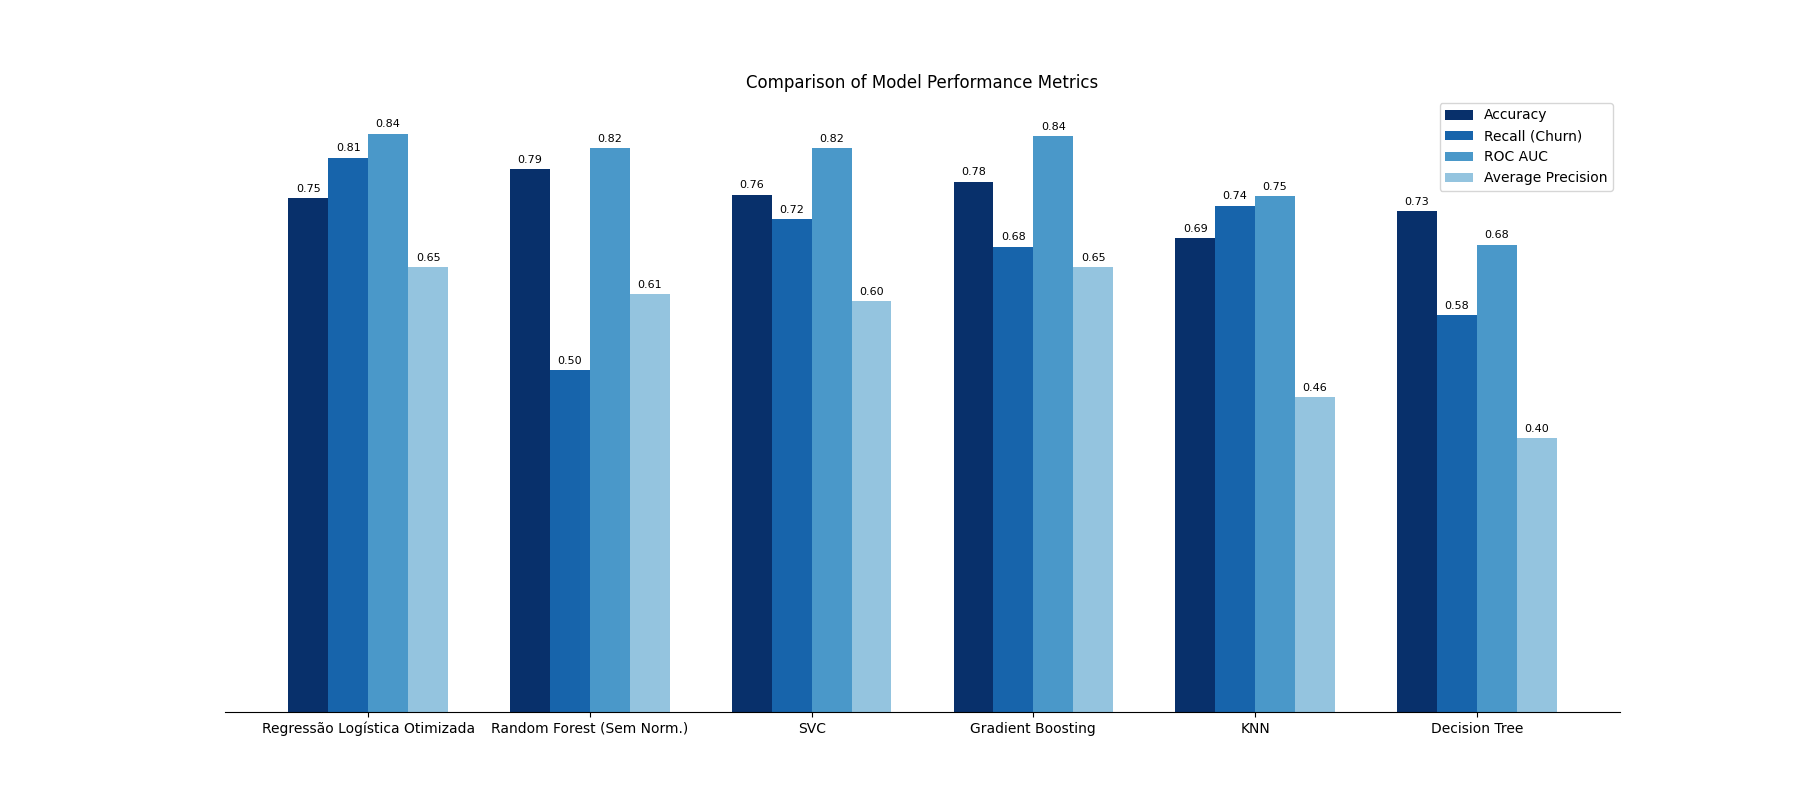

*   A **Regressão Logística Otimizada** apresentou o maior Recall para a classe Churn (0.81). Isso significa que o modelo foi capaz de identificar 81% dos clientes que realmente evadiram no conjunto de teste. Embora sua Acurácia (0.751) e Precision (0.52) sejam inferiores a outros modelos, seu alto Recall a torna a mais adequada para o objetivo de identificar o máximo de churners.
*   O **Gradient Boosting** também apresentou um bom Recall (0.68) e um alto ROC AUC (0.842), sendo uma alternativa viável.
*   O **Random Forest (Sem Normalização)** obteve a maior Acurácia (0.793) e uma boa Precision (0.64), mas seu Recall para Churn (0.50) é significativamente menor, o que a torna menos ideal para o objetivo de identificar a maioria dos churners.
*   Os modelos **SVC**, **KNN** e **Decision Tree** apresentaram desempenho inferior em Recall e/ou ROC AUC em comparação com a Regressão Logística e Gradient Boosting.

## **5. Estratégias de Retenção Propostas**

Com base nos fatores que mais influenciam a evasão e no desempenho do modelo de Regressão Logística Otimizada, propomos as seguintes estratégias de retenção:

*   **Foco em Clientes de Curto Prazo:** Clientes nos primeiros meses de contrato são mais propensos a evadir. Ações de engajamento e onboarding direcionadas a este grupo podem reduzir o churn inicial.
*   **Incentivo a Contratos de Longo Prazo:** Promover e incentivar a adesão a contratos de dois anos, destacando os benefícios e a estabilidade que oferecem.
*   **Avaliação do Serviço de Fibra Óptica:** Investigar as possíveis causas da maior evasão entre clientes de fibra óptica. Pode ser necessário melhorar a qualidade do serviço, rever preços ou oferecer suporte técnico mais eficiente para este segmento.
*   **Análise do Método de Pagamento (Cheque Eletrônico):** Entender por que clientes que usam cheque eletrônico evadem mais. Pode haver problemas no processo de pagamento ou insatisfação associada a este método. Oferecer alternativas de pagamento mais convenientes pode ser uma solução.
*   **Monitoramento de Clientes com Altas Cobranças Mensais:** Clientes com contas mais altas podem estar mais sensíveis a custos e buscar alternativas. Oferecer pacotes de descontos, benefícios exclusivos ou revisão de planos pode ser eficaz.
*   **Programas para Clientes Idosos:** Desenvolver programas de fidelidade, suporte técnico facilitado ou planos adaptados para clientes idosos, que demonstraram uma ligeira maior propensão à evasão.
*   **Revisão do Processo de Faturamento Sem Papel:** Investigar se há alguma insatisfação ou dificuldade para clientes que optam por faturamento sem papel que possa estar contribuindo para o churn.
*   **Fortalecer Serviços de Valor Agregado:** Destacar e promover os benefícios de serviços como segurança online, backup, proteção de dispositivos e suporte técnico, pois clientes que utilizam esses serviços tendem a ser mais leais.
*   **Utilização do Modelo Preditivo:** Implementar o modelo de Regressão Logística Otimizada para identificar proativamente os clientes com alta probabilidade de churn. A equipe de marketing e atendimento ao cliente pode então direcionar esforços de retenção para estes clientes, oferecendo ofertas personalizadas, contato proativo ou resolução de problemas.

## **6. Conclusão**

A análise preditiva de churn permitiu identificar os principais fatores que levam os clientes da TelecomX a cancelar seus serviços. O modelo de Regressão Logística Otimizada, com seu alto Recall para a classe Churn, é a ferramenta recomendada para identificar proativamente os clientes em risco. A implementação das estratégias de retenção propostas, baseadas nestas descobertas e na capacidade preditiva do modelo, tem o potencial de reduzir significativamente a taxa de evasão e aumentar a receita a longo prazo da TelecomX. É crucial que a empresa monitore continuamente o desempenho do modelo e adapte suas estratégias de retenção conforme necessário.